<center>
    <h1>Deep Learning for Natural Language Processing</h1>
</center>

In this notebook we will develop a **sentiment classifier** on a given English-language **Twitter Dataset** containing some user comments. The main goal is to build a model that understands whether a specific comment has a **positive** sentiment or a **negative** sentiment.

## Loading the Datasets 📥🗂️

We will  begin by importing the **dataset** we are going to work with. The provided dataset consists of **3 CSV files** each one having its significant role in the process. We have the **training**, **validating** and **testing** files.
1. The training file is going to be used to train our model.
2. The validating file will tell us how good our model is by computing its accuracy.
3. The testing file is going to be used to test our model and extract some results and statistics.

Let's load our dataset files that are located in the `/Data/` directory.

In [87]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Load all the dataset files using pandas and store inside some dataframe variables
train_df = pd.read_csv('../Data/train_dataset.csv')
val_df = pd.read_csv('../Data/val_dataset.csv')
test_df = pd.read_csv('../Data/test_dataset.csv')

Let's take a look at some of the records of the training dataset.

In [88]:
train_df.head()

,ID,Text,Label
0,189385,@whoisralphie dude I'm so bummed ur leaving!,0
1,58036,"oh my god, a severed foot was foun in a wheely...",0
2,190139,I end up &quot;dog dialing&quot; sumtimes. Wha...,1
3,99313,@_rachelx meeeee toooooo!,0
4,157825,"I was hoping I could stay home and work today,...",0


### Data sizes 📏📐

Let's have a look at the **sizes** of these datasets. In machine learning a **suitable size** of training, validating and testing data is around 70%, 20% and 10% respectively. 

Training Dataset size: 445164
Validating Dataset size: 127188
Testing Dataset size: 42398


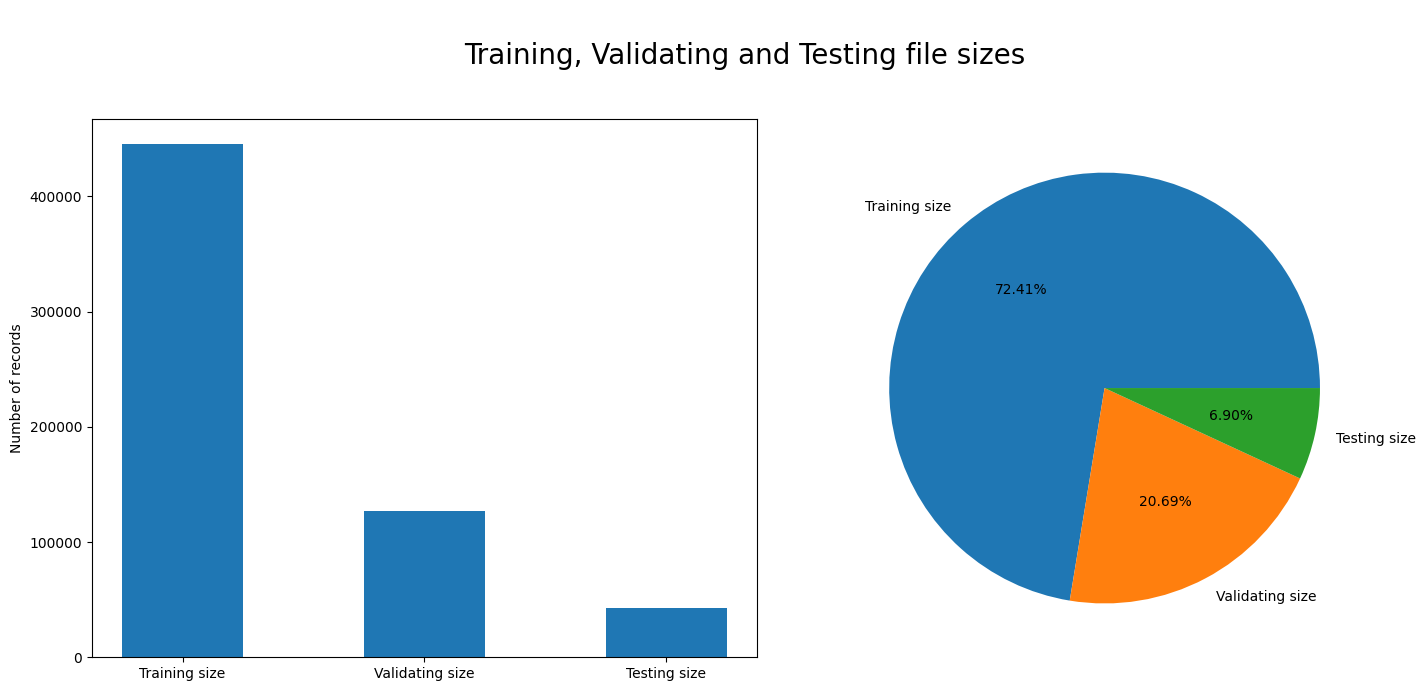

In [89]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms

train_size = train_df.size
val_size = val_df.size
test_size = test_df.size

print(f"Training Dataset size: {train_size}")
print(f"Validating Dataset size: {val_size}")
print(f"Testing Dataset size: {test_size}")

sizes = [train_size, val_size, test_size]
labels = ["Training size", "Validating size", "Testing size"]

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].bar(labels, sizes, width=0.5)
axes[0].set_ylabel("Number of records")

axes[1].pie(sizes, labels=labels, autopct="%1.2f%%")

plt.suptitle("\nTraining, Validating and Testing file sizes\n", fontsize=20)
plt.tight_layout()
plt.savefig("../plots/dataset_file_sizes.png")
plt.show()

From the results above we can easily tell that our dataset files satisfy the data splitting criterion.

### Data cleaning 🧹

The first step of the whole process is to **pre-process** and **clean** our dataset files. In Machine Learning and AI applications, this is the initial and really important step. We will focus on
1. Removing **URLs**, **User mentions**, **Hashtags** and **special characters**.
2. **Lowercasing** the texts
3. Removing **extra spaces** and **line breaks**
4. Handling **duplicates** and **missing values**

Let's begin by implementing a **function** that will handle the data pre-processing for a given string.

In [90]:
import re

def clean_text(text: str) -> str:
    text = re.sub(r"http\S+|www\S+|https\S+", "", text) # Remove url links
    text = re.sub(r"@\w+", "", text) # Remove mentions
    text = re.sub(r"#", "", text) # Remove hastags
    text = re.sub(r"&[^;\s]+;", "", text) # Remove special characters
    text = text.lower() # Convert to lowercase
    text = re.sub(r"\s+", " ", text) # Remove extra spaces
    
    return text

Let's apply this function to the 3 dataset files, and see the results.

In [91]:
# Apply the cleaning function to every dataset file and create a new column with the modified text
train_df["Cleaned_text"] = train_df["Text"].apply(clean_text)
val_df["Cleaned_text"] = val_df["Text"].apply(clean_text)
test_df["Cleaned_text"] = test_df["Text"].apply(clean_text)

train_df.head(10)

,ID,Text,Label,Cleaned_text
0,189385,@whoisralphie dude I'm so bummed ur leaving!,0,dude i'm so bummed ur leaving!
1,58036,"oh my god, a severed foot was foun in a wheely...",0,"oh my god, a severed foot was foun in a wheely..."
2,190139,I end up &quot;dog dialing&quot; sumtimes. Wha...,1,i end up dog dialing sumtimes. what's dog dial...
3,99313,@_rachelx meeeee toooooo!,0,meeeee toooooo!
4,157825,"I was hoping I could stay home and work today,...",0,"i was hoping i could stay home and work today,..."
5,130560,says plurk karma finally reached the 50s. stil...,0,says plurk karma finally reached the 50s. stil...
6,121871,"Good to hear it @Arth This is a bit more, but ...",1,"good to hear it this is a bit more, but a la f..."
7,86813,@davorg in that case im gonna start tweeting a...,1,in that case im gonna start tweeting about ny...
8,197517,"@belunyc its alright love, how are you?",1,"its alright love, how are you?"
9,6937,@brightondoll haha that has to be the best ana...,1,haha that has to be the best analogy ever. mo...


### Data Analysis 📈📊

We will now proceed to some **data analysis**. We will extract some information refering to the **training dataset** and will observe the effects of the words inside this dataset file.

#### Word Cloud & Tokens Frequency ☁️📊

In this step we will extract the **word cloud** of the dataset and plot the **frequency** of the **top 15 most common words** inside the file.

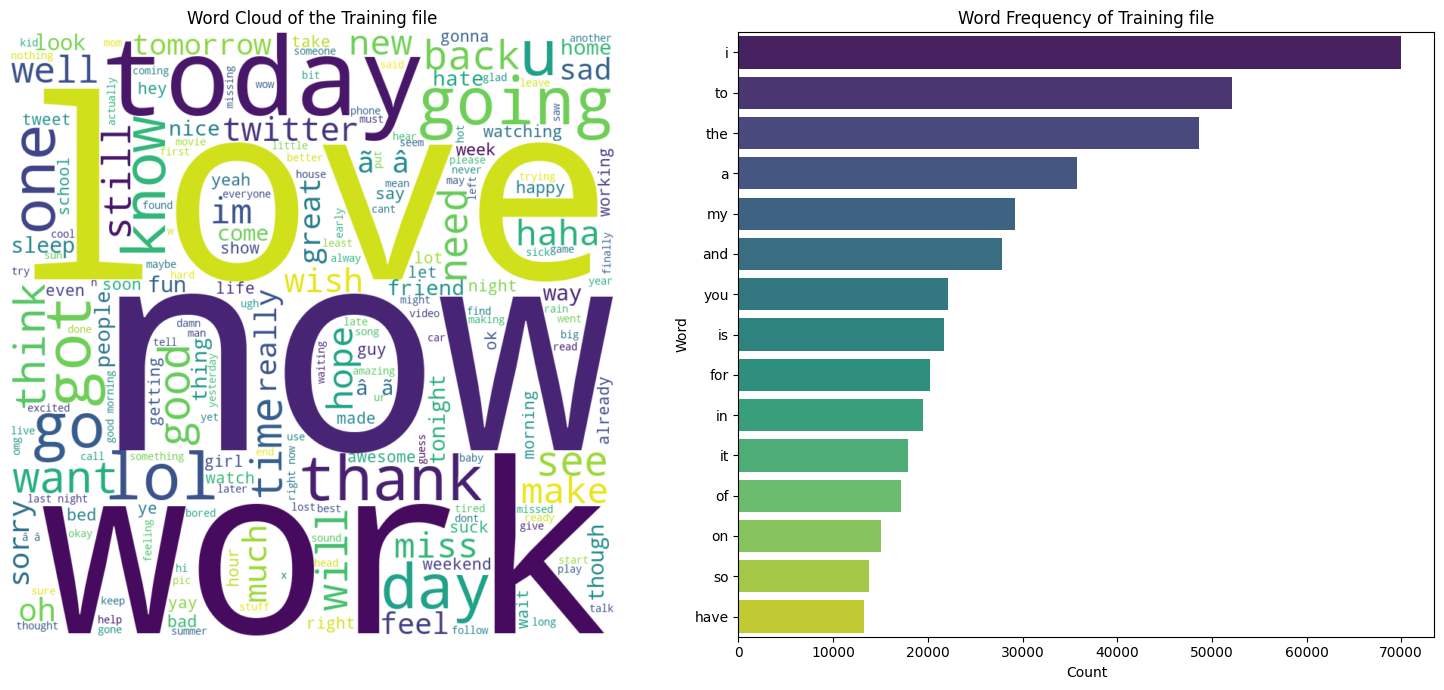

In [99]:
from wordcloud import WordCloud

all_text = " ".join(train_df["Cleaned_text"])
all_words = " ".join(train_df["Cleaned_text"]).split()

word_counts = Counter(all_words)
most_common_words = word_counts.most_common(15)

common_df = pd.DataFrame(most_common_words, columns=["Word", "Count"])

wordcloud = WordCloud(width=800, height=800, background_color="#FFF")
wordcloud.generate(all_text)

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].imshow(wordcloud, interpolation="bilinear")
axes[0].axis("off")
axes[0].set_title("Word Cloud of the Training file")

sns.barplot(x="Count", y="Word", data=common_df, palette="viridis", ax=axes[1])
axes[1].set_title("Word Frequency of Training file")

plt.savefig("../plots/word_cloud_tokens_frequency.png")
plt.tight_layout()
plt.show()